In [2]:
import tensorflow as tf
import datetime

# Load the TensorBoard notebook extension
%load_ext tensorboard

!echo %CD%
!mkdir .\logs
!mkdir .\logs\lab-10-1-mnist_softmax-tf2
!rmdir /q /s .\logs\lab-10-1-mnist_softmax-tf2

log_dir = "./logs/lab-10-1-mnist_softmax-tf2/"

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = log_dir + current_time + '/train'
test_log_dir = log_dir + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)


C:\Users\greenblue\Work\study\machineLearning\DeepLearningZeroToAll


하위 디렉터리 또는 파일 .\logs이(가) 이미 있습니다.
하위 디렉터리 또는 파일 .\logs\lab-10-1-mnist_softmax-tf2이(가) 이미 있습니다.


Epoch: 0001, Cost: 5.098366261
Epoch: 0002, Cost: 1.733558655
Epoch: 0003, Cost: 1.122886419
Epoch: 0004, Cost: 0.883196890
Epoch: 0005, Cost: 0.752380669
Epoch: 0006, Cost: 0.667544544
Epoch: 0007, Cost: 0.606975436
Epoch: 0008, Cost: 0.561246276
Epoch: 0009, Cost: 0.525423467
Epoch: 0010, Cost: 0.496609509
Epoch: 0011, Cost: 0.472936690
Epoch: 0012, Cost: 0.453118533
Epoch: 0013, Cost: 0.436250567
Epoch: 0014, Cost: 0.421689808
Epoch: 0015, Cost: 0.408969969
Epoch: 0016, Cost: 0.397745490
Epoch: 0017, Cost: 0.387755930
Epoch: 0018, Cost: 0.378798038
Epoch: 0019, Cost: 0.370713025
Epoch: 0020, Cost: 0.363370955
Epoch: 0021, Cost: 0.356669098
Epoch: 0022, Cost: 0.350520879
Epoch: 0023, Cost: 0.344856530
Epoch: 0024, Cost: 0.339617461
Epoch: 0025, Cost: 0.334755450
Epoch: 0026, Cost: 0.330229223
Epoch: 0027, Cost: 0.326003969
Epoch: 0028, Cost: 0.322049588
Epoch: 0029, Cost: 0.318340182
Epoch: 0030, Cost: 0.314853013
Epoch: 0031, Cost: 0.311568558
Epoch: 0032, Cost: 0.308469355
Epoch: 0

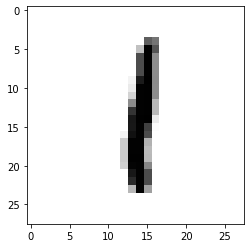

'\nEpoch: 0001 Cost: 5.745170949\nEpoch: 0002 Cost: 1.780056722\nEpoch: 0003 Cost: 1.122778654\n...\nEpoch: 0048 Cost: 0.271918680\nEpoch: 0049 Cost: 0.270640434\nEpoch: 0050 Cost: 0.269054370\nLearning Finished!\nAccuracy: 0.9194\n'

In [5]:
from functools import partial as bind
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
assert(tf.__version__.find('2') == 0)
tf.random.set_seed(777)  # for reproducibility

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = tf.reshape(x_train, [-1, 28*28])
x_train = tf.cast(x_train, tf.float32)
y_train = tf.one_hot(y_train, 10)
y_train = tf.cast(y_train, tf.float32)
x_train_len = len(x_train)
y_train_len = len(y_train)
# print(x_train_len, y_train_len)
# print(x_train, y_train)

x_test = tf.reshape(x_test, [-1, 28*28])
x_test = tf.cast(x_test, tf.float32)
y_test = tf.one_hot(y_test, 10)
x_test_len = len(x_test)
y_test_len = len(y_test)
# print(x_test_len, y_test_len)
# print(x_test, y_test)

learning_rate = 0.001
nb_classes = 10
batch_size = 100
num_epochs = 50
num_iterations = int(x_train_len / batch_size)

# weights & bias
W = tf.Variable(tf.random.normal([784, nb_classes]))
b = tf.Variable(tf.random.normal([nb_classes]))

# define optimizer, cost/loss and others
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

@tf.function
def hypothesis(X):
    return tf.matmul(X, W) + b

@tf.function
def cost(X, Y):
    return tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis(X),
                                                labels=tf.stop_gradient([Y]))
    )

@tf.function
def correct_prediction(X, Y):
    return tf.equal(tf.argmax(hypothesis(X), axis=1), tf.argmax(Y, axis=1))

@tf.function
def accuracy(X, Y):
    return tf.reduce_mean(tf.cast(correct_prediction(X, Y), tf.float32))

# train my model
for epoch in range(num_epochs):
    avg_cost = 0

    for i in range(num_iterations):
        pos = i * batch_size
        batch_xs = x_train[pos: pos + batch_size, :]
        batch_ys = y_train[pos: pos + batch_size, :]
#         print(batch_xs)
#         print(batch_ys)
        
        cost_val = cost(batch_xs, batch_ys)
        avg_cost += cost_val / num_iterations

        # Minimize
        optimizer.minimize(bind(cost, batch_xs, batch_ys), var_list=[W, b])

        step = epoch * num_iterations + i
        if step % 100 == 0:
            with train_summary_writer.as_default():
                tf.summary.scalar('loss', cost_val, step=step)
                tf.summary.scalar('accuracy', accuracy(batch_xs, batch_ys), step=step)
        
    tf.print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

tf.print("Learning finished")

# Test model and check accuracy
tf.print(
    "Accuracy: ",
    accuracy(x_test, y_test)
)

# Get one and predict
r = random.randint(0, y_test_len - 1)
tf.print(
    "Label: ", tf.argmax(y_test[r : r + 1], 1)
)
tf.print(
    "Prediction: ",
    tf.argmax(hypothesis(x_test[r : r + 1]), 1),
)

plt.imshow(
    tf.reshape(x_test[r : r + 1], [28, 28]),
    cmap="Greys",
    interpolation="nearest",
)
plt.show()

'''
Epoch: 0001 Cost: 5.745170949
Epoch: 0002 Cost: 1.780056722
Epoch: 0003 Cost: 1.122778654
...
Epoch: 0048 Cost: 0.271918680
Epoch: 0049 Cost: 0.270640434
Epoch: 0050 Cost: 0.269054370
Learning Finished!
Accuracy: 0.9194
'''


In [4]:
#!taskkill /im tensorboard.exe /F
%tensorboard --logdir logs --host "0.0.0.0" --port 6006

Reusing TensorBoard on port 6006 (pid 23120), started 0:01:05 ago. (Use '!kill 23120' to kill it.)